# Метрики качества классификации

## 1. Данные

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = pd.read_pickle('data/shelter/xtrain.pkl')
y = pd.read_csv('data/shelter/train.csv')['OutcomeType']

для учебных примеров оставим только 2 класса, отличающихся значительно и по смыслу, и по размеру

In [7]:
y.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [8]:
is_first_2_class = (y=='Adoption')|(y=='Euthanasia')

In [9]:
X = X[is_first_2_class]
X.index = range(len(X))
y = y[is_first_2_class]
y.index = range(len(y))

y теперь можно перевести в множество {0,1}

In [10]:
y = (y=='Adoption').astype(int)

для оценки качества разобьём выборки на 2 части, 3:1

In [11]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.25)

-----

## 2. Обучим классификатор

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier(max_depth=5)

In [14]:
clf.fit(Xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
yval_pred = clf.predict(Xval)
yval_pred_proba = clf.predict_proba(Xval)

-----

## 3. Написание метрик с нуля

In [16]:
from sklearn import metrics

-----

In [17]:
metrics.confusion_matrix(yval, yval_pred)

array([[ 248,  160],
       [  16, 2657]], dtype=int64)

In [18]:
metrics.accuracy_score(yval, yval_pred)

0.9428756897111328

In [19]:
metrics.precision_score(yval, yval_pred)

0.9432019879304224

In [20]:
metrics.recall_score(yval, yval_pred)

0.9940142162364385

In [21]:
metrics.roc_auc_score(yval, yval_pred_proba[:,1])

0.9344135802469136

In [22]:
metrics.average_precision_score(yval, yval_pred_proba[:,1])

0.983781763927123

## Реализовать самостоятельно вывод графика ROC-AUC

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def calculate_tpr_and_fpr(y_true, y_pred_probas, alpha):
    ## 1. Отнесите  наблюдения к одному  из нескольких классов в зависимости от порога
    ## 2. Посчитайте tpr и fpr
    
    
    return tpr, fpr

In [25]:
def roc_auc_plot(y_true, y_pred_probas):
    alphas = np.arange(0, 1, 0.001)
    tprs, fprs = [], []
    for a in alphas:
        tpr, fpr = calculate_tpr_and_fpr(y_true, y_pred_probas, a)
        tprs.append(tpr)
        fprs.append(fpr)
        
    plt.plot(fprs, tprs)
    plt.show()

In [26]:
roc_auc_plot(yval, yval_pred_proba[:, 1])

NameError: name 'tpr' is not defined

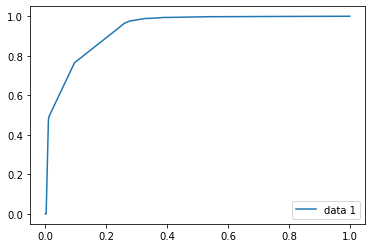

In [27]:
## SKLEARN
fpr, tpr, _ = metrics.roc_curve(yval,  yval_pred_proba[: ,1])
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()